In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
pip install searoute

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 976.4/976.4 kB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for searoute: filename=searoute-1.2.2-py3-none-any.whl size=980151 sha256=e5e8b24f4a74cb5bdfce40c2b8e8f5544be0814e34608abeca9cc271d2f75f8b
  Stored in directory: /root/.cache/pip/wheels/83/5e/b1/31db51d1830e0bf9d6f0f1174fca9b050f3a6e38944d06e2b8
Successfully built searoute


In [3]:
import searoute as sr

In [85]:
#Define origin and destination points:
origin = [0.3515625, 50.064191736659104]

destination = [117.42187500000001, 39.36827914916014]

In [86]:
route = sr.searoute(origin, destination)
# > Returns a GeoJSON LineString Feature
# show route distance with unit
print("{:.1f} {}".format(route.properties['length'], route.properties['units']))

20383.9 km


In [87]:
route_length = route.properties['length']

In [88]:
route_duration_hours = route.properties['duration_hours']

In [89]:
route_duration_hours

458.6013670819192

In [90]:
route_duration_days = route_duration_hours/24

In [91]:
route_duration_days

19.108390295079968

In [92]:
# Optionally, define the units for the length calculation included in the properties object.
# Defaults to km, can be can be 'm' = meters 'mi = miles 'ft' = feet 'in' = inches 'deg' = degrees
# 'cen' = centimeters 'rad' = radians 'naut' = nautical 'yd' = yards
routeMiles = sr.searoute(origin, destination, units="mi")

In [93]:
route_length_miles = routeMiles.properties['length']

In [94]:
route_length_miles

12665.976668923156

In [95]:
route

{"geometry": {"coordinates": [[0.372734, 50.105616], [0.1, 49.9], [-0.313513, 49.914768], [-0.550422, 49.923229], [-0.553245, 49.92333], [-1.3, 49.95], [-1.47977, 49.895072], [-1.665743, 49.838248], [-1.93365, 49.75639], [-1.992006, 49.738559], [-2.39189, 49.616376], [-3.197043, 49.370363], [-3.986163, 49.129249], [-4.030414, 49.115729], [-4.270518, 49.042365], [-5.06401, 48.799916], [-5.5, 48.6667], [-6.698867, 47.340067], [-7.954994, 45.668797], [-8.49576, 44.934776], [-9.019938, 43.924891], [-9.142206, 43.689329], [-9.14264, 43.688493], [-9.143299, 43.687223], [-9.5, 43], [-9.9844, 40.7798], [-9.6, 38.5], [-9.452092, 37.781589], [-9.25, 36.8], [-8.219465, 36.549727], [-7.26966, 36.31906], [-5.75, 35.95], [-5.354867, 35.968819], [-5.269383, 35.97289], [-4.7, 36], [-3.683043, 36.156455], [-3.670714, 36.158352], [-3.264225, 36.220888], [-2.590675, 36.324512], [-2.244793, 36.377724], [-1.62439, 36.473171], [-0.366667, 36.666667], [3.1, 37.2], [7.5, 37.4], [10.1431, 37.4851], [10.372293,

In [96]:
route_coordinates = route.geometry['coordinates']

In [97]:
route_coordinates

[[0.372734, 50.105616],
 [0.1, 49.9],
 [-0.313513, 49.914768],
 [-0.550422, 49.923229],
 [-0.553245, 49.92333],
 [-1.3, 49.95],
 [-1.47977, 49.895072],
 [-1.665743, 49.838248],
 [-1.93365, 49.75639],
 [-1.992006, 49.738559],
 [-2.39189, 49.616376],
 [-3.197043, 49.370363],
 [-3.986163, 49.129249],
 [-4.030414, 49.115729],
 [-4.270518, 49.042365],
 [-5.06401, 48.799916],
 [-5.5, 48.6667],
 [-6.698867, 47.340067],
 [-7.954994, 45.668797],
 [-8.49576, 44.934776],
 [-9.019938, 43.924891],
 [-9.142206, 43.689329],
 [-9.14264, 43.688493],
 [-9.143299, 43.687223],
 [-9.5, 43],
 [-9.9844, 40.7798],
 [-9.6, 38.5],
 [-9.452092, 37.781589],
 [-9.25, 36.8],
 [-8.219465, 36.549727],
 [-7.26966, 36.31906],
 [-5.75, 35.95],
 [-5.354867, 35.968819],
 [-5.269383, 35.97289],
 [-4.7, 36],
 [-3.683043, 36.156455],
 [-3.670714, 36.158352],
 [-3.264225, 36.220888],
 [-2.590675, 36.324512],
 [-2.244793, 36.377724],
 [-1.62439, 36.473171],
 [-0.366667, 36.666667],
 [3.1, 37.2],
 [7.5, 37.4],
 [10.1431, 37.485

In [98]:
# Extract longitudes and latitudes into separate lists
lons = [coord[0] for coord in route_coordinates]
lats = [coord[1] for coord in route_coordinates]

In [99]:
# Print the resulting lists
print("Longitudes (lons):", lons)
print("Latitudes (lats):", lats)

Longitudes (lons): [0.372734, 0.1, -0.313513, -0.550422, -0.553245, -1.3, -1.47977, -1.665743, -1.93365, -1.992006, -2.39189, -3.197043, -3.986163, -4.030414, -4.270518, -5.06401, -5.5, -6.698867, -7.954994, -8.49576, -9.019938, -9.142206, -9.14264, -9.143299, -9.5, -9.9844, -9.6, -9.452092, -9.25, -8.219465, -7.26966, -5.75, -5.354867, -5.269383, -4.7, -3.683043, -3.670714, -3.264225, -2.590675, -2.244793, -1.62439, -0.366667, 3.1, 7.5, 10.1431, 10.372293, 11, 11.172235, 11.827836, 12.086301, 12.097004, 12.110644, 13.263819, 15.2, 16.726588, 17.902084, 21.407365, 23, 24.926664, 25.478721, 26.306431, 27.6298, 27.927542, 28.212434, 28.905525, 30.408377, 32.1, 32.387159, 32.306671, 32.382202, 32.557983, 32.6, 33.75, 34.5, 37, 38.9, 41.2, 42, 43.3, 43.465, 45, 51, 53.059021, 54.7085, 58.3951, 59.894005, 60.825733, 62.0601, 64.303249, 64.698862, 64.992809, 65.7044, 68.858995, 69.3291, 69.671733, 69.999915, 70.817426, 70.84994, 72.9354, 75.966807, 76.5251, 80.1, 81.9, 85.9479, 90, 94, 97, 1

In [100]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [101]:
# Create a GeoDataFrame with your coordinates
gdf = gpd.GeoDataFrame(geometry=gpd.points_from_xy(lons, lats))

<ipython-input-102-8865c476e1f0>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


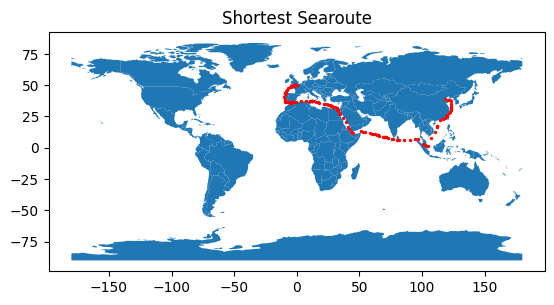

In [102]:

# Create a world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the world map
world.plot()

# Plot your coordinates on top
gdf.plot(marker='o', color='red', markersize=2, ax=plt.gca())

# Customize the plot, add labels, etc.
plt.title('Shortest Searoute')

# Show the plot
plt.show()


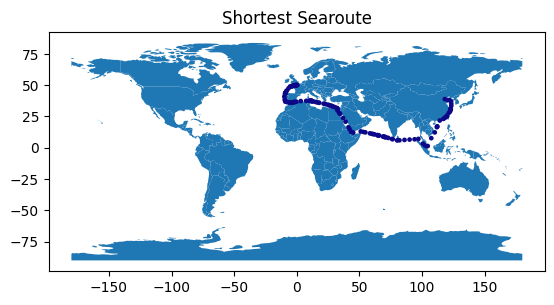

In [103]:
from shapely.geometry import LineString

# Create a LineString geometry from your coordinates
route_geometry = LineString(list(zip(lons, lats)))

# Add the LineString to your GeoDataFrame
gdf['route'] = route_geometry

# Plot the world map
world.plot()

# Plot your route on top
gdf.plot(column='route', cmap='plasma', linewidth=2, markersize = 2, ax=plt.gca())

# Customize the plot, add labels, etc.
plt.title('Shortest Searoute')

# Show the plot
plt.show()


In [106]:
avg_speed_kmh = route_length/route_duration_hours

In [107]:
avg_speed_kmh

44.448

In [108]:
avg_speed_knots = avg_speed_kmh * 0.539956803

In [109]:
avg_speed_knots

23.999999979744

In [110]:
titles = ['Distance (km)', 'Time (hours)', 'Time (days)', 'Speed (knots)', 'Speed (kmh)']
values = [route_length, route_duration_hours, route_duration_days, avg_speed_knots, avg_speed_kmh]


data = [titles, values]
df = pd.DataFrame(data)

# Display the DataFrame
print(df)


               0             1            2              3            4
0  Distance (km)  Time (hours)  Time (days)  Speed (knots)  Speed (kmh)
1   20383.913564    458.601367     19.10839           24.0       44.448
